In [3]:
import pandas as pd

# Read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validate = pd.read_csv('validate.csv')

display(train.head())

,public_date,ticker,roa,intcov_ratio,quick_ratio,intcov,bm,npm,debt_assets,debt_ebitda,inv_turn,cash_ratio,long_term_credit_rating,rating
0,2017-02-28,GME,0.185177,14.415011,0.449969,9.660044,0.873019,0.043169,0.530882,0.849093,4.689136,0.246482,BB,0
1,2017-02-28,UAL,0.171677,8.104235,0.523848,4.685668,0.377644,0.061905,0.784280,1.683446,30.021105,0.360410,BB-,0
2,2017-02-28,BHI,0.023009,-3.764045,3.193576,-14.382022,0.459428,-0.278224,0.330829,6.084677,3.465933,1.984375,A,1
3,2017-02-28,SLGN,0.146088,4.617429,0.416807,3.211453,0.272515,0.042445,0.850951,3.370937,4.770234,0.028649,BB+,0
4,2017-02-28,NEU,0.300441,21.607983,1.783397,15.503485,0.098089,0.118784,0.658826,1.250215,3.995609,0.652276,BBB+,1


In [4]:
columnsOfInterest = ['roa', 'intcov_ratio', 'quick_ratio', 'intcov', 'bm', 'npm', 'debt_assets', 'debt_ebitda', 'inv_turn', 'cash_ratio']
yTrain = train['rating']
xTrain = train[columnsOfInterest]

yTest = test['rating']
xTest = test[columnsOfInterest]

yValidate = validate['rating']
xValidate = validate[columnsOfInterest]

Columns selected are : 
intcov_ratio
quick_ratio
bm
npm
debt_assets
inv_turn
cash_ratio


Columns dropped are : 
roa
intcov
debt_ebitda


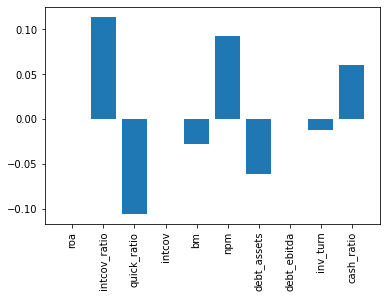

In [28]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)
xValidate = scaler.transform(xValidate)


# Use lasso regularization to select features
from sklearn.linear_model import LassoCV


# Fit the model
clf = LassoCV().fit(xTrain, yTrain)


# Print names of non-zero coefficients
selectedFeatures = []
print("Columns selected are : ")
for i in range(len(clf.coef_)):
    if clf.coef_[i] != 0:
        print(columnsOfInterest[i])
        selectedFeatures.append(i)

print("\n\nColumns dropped are : ")
for i in range(len(clf.coef_)):
    if clf.coef_[i] == 0:
        print(columnsOfInterest[i])


# Plot the coefficients as bar graph
import matplotlib.pyplot as plt
plt.bar(columnsOfInterest, clf.coef_)
plt.xticks(rotation=90)
plt.show()

In [17]:
# Do logistic regression on the selected features
from sklearn.linear_model import LogisticRegression

# Fit the model
clf = LogisticRegression().fit(xTrain[:, selectedFeatures], yTrain)

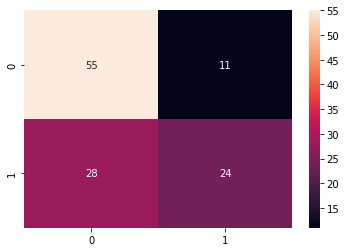

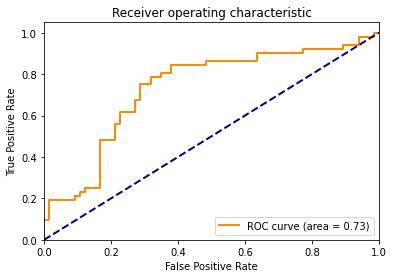

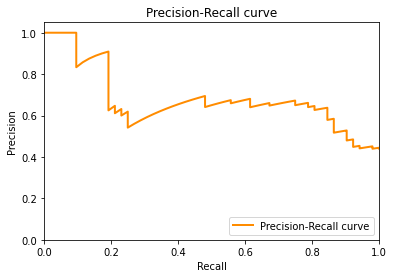

In [23]:
clf.score(xTest[:, selectedFeatures], yTest)

# Build a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

yPred = clf.predict(xTest[:, selectedFeatures])
cm = confusion_matrix(yTest, yPred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

yPred = clf.predict_proba(xTest[:, selectedFeatures])[:, 1]
fpr, tpr, thresholds = roc_curve(yTest, yPred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

yPred = clf.predict_proba(xTest[:, selectedFeatures])[:, 1]
precision, recall, thresholds = precision_recall_curve(yTest, yPred)

plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
            lw=lw, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()



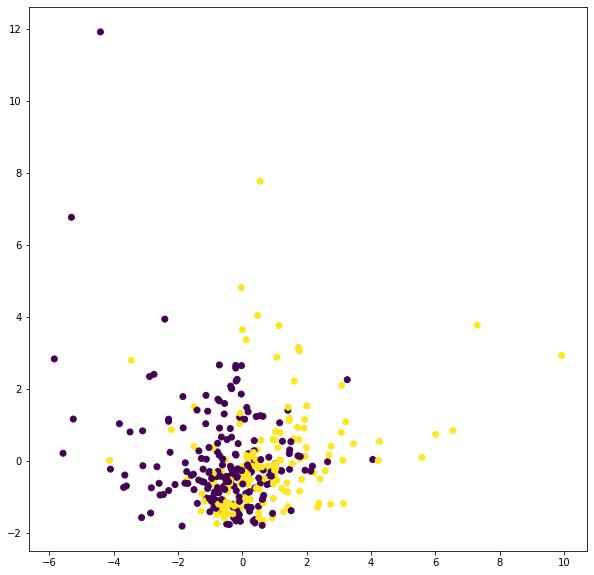

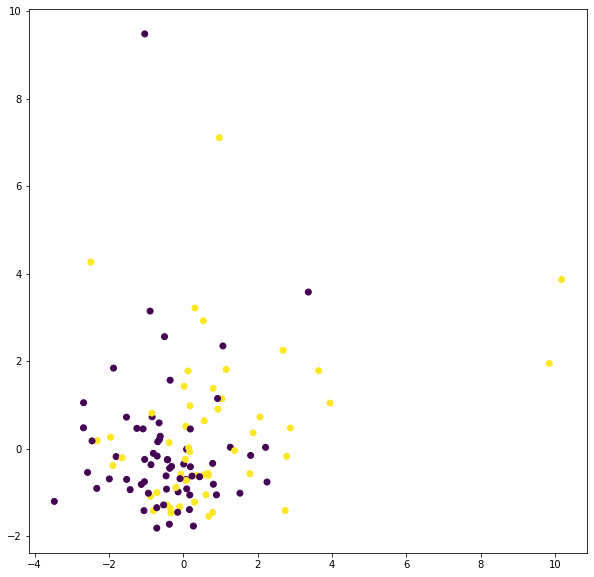

In [26]:
# Do pca, plot the first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(xTrain)
xTrain2 = pca.transform(xTrain)
xTest2 = pca.transform(xTest)
xValidate2 = pca.transform(xValidate)

plt.figure(figsize=(10, 10))
plt.scatter(xTrain2[:, 0], xTrain2[:, 1], c=yTrain)
plt.show()

# Pca plot for test data
plt.figure(figsize=(10, 10))
plt.scatter(xTest2[:, 0], xTest2[:, 1], c=yTest)
plt.show()